In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

votes_file = 'datasets/votes.csv'
airport_file = 'datasets/airport.csv'

In [3]:
vote = pd.read_csv('/Users/generalassembly/Documents/repo-DC-DSI-3/DC-DSI-3/curriculum/07-week/7.08-pca-lab/datasets/votes.csv')
airport = pd.read_csv('/Users/generalassembly/Documents/repo-DC-DSI-3/DC-DSI-3/curriculum/07-week/7.08-pca-lab/datasets/airport.csv')

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas and handle any preprocessing that it may need. 

In [5]:
vote.shape

(435, 18)

In [6]:
airport.shape

(841, 15)

In [7]:
vote.head()

,Unnamed: 0,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,1,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,3,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,4,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,5,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [8]:
airport.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [9]:
vote.isnull().sum()

Unnamed: 0      0
Class           0
V1             12
V2             48
V3             11
V4             11
V5             15
V6             11
V7             14
V8             15
V9             22
V10             7
V11            21
V12            31
V13            25
V14            17
V15            28
V16           104
dtype: int64

In [11]:
vote.dropna(inplace=True)

In [12]:
vote.isnull().sum()

Unnamed: 0    0
Class         0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
dtype: int64

In [13]:
vote.shape

(232, 18)

In [10]:
airport.isnull().sum()


airport                               0
year                                  0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
dtype: int64

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [14]:
vote.head()

,Unnamed: 0,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
5,6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,9,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,20,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,24,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,26,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [41]:
subjective_cols = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16']
print subjective_cols

X = vote[subjective_cols]

## Remember, we need to center before PCA and some like to normalize.
#subjective = (X - X.mean()) / X.std()

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']


In [42]:
## create a dummy variable
df_dummies_workclass  = pd.get_dummies(X[subjective_cols])
df_dummies_workclass.columns = [u'V1_n', u'V1_y', u'V2_n', u'V2_y', u'V3_n', u'V3_y', u'V4_n', u'V4_y',
       u'V5_n', u'V5_y', u'V6_n', u'V6_y', u'V7_n', u'V7_y', u'V8_n', u'V8_y',
       u'V9_n', u'V9_y', u'V10_n', u'V10_y', u'V11_n', u'V11_y', u'V12_n',
       u'V12_y', u'V13_n',u'V13_y', u'V14_n', u'V14_y', u'V15_n', u'V15_y',
       u'V16_n', u'V16_y'] 

In [43]:
df_dummies_workclass.drop([u'V1_n',u'V2_n',u'V3_n',u'V4_n',u'V5_n',u'V6_n',u'V7_n',u'V8_n',u'V9_n',u'V10_n',u'V11_n',u'V12_n',u'V13_n',u'V14_n',u'V15_n',u'V16_n'], axis=1, inplace=True)

In [44]:
X =X.join(df_dummies_workclass)

In [45]:
X.drop([u'V1',u'V2',u'V3',u'V4',u'V5',u'V6',u'V7',u'V8',u'V9',u'V10',u'V11',u'V12',u'V13',u'V14',u'V15',u'V16'], axis=1, inplace=True)

In [47]:
X.head()

,V1_y,V2_y,V3_y,V4_y,V5_y,V6_y,V7_y,V8_y,V9_y,V10_y,V11_y,V12_y,V13_y,V14_y,V15_y,V16_y
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [48]:
X.shape

(232, 16)

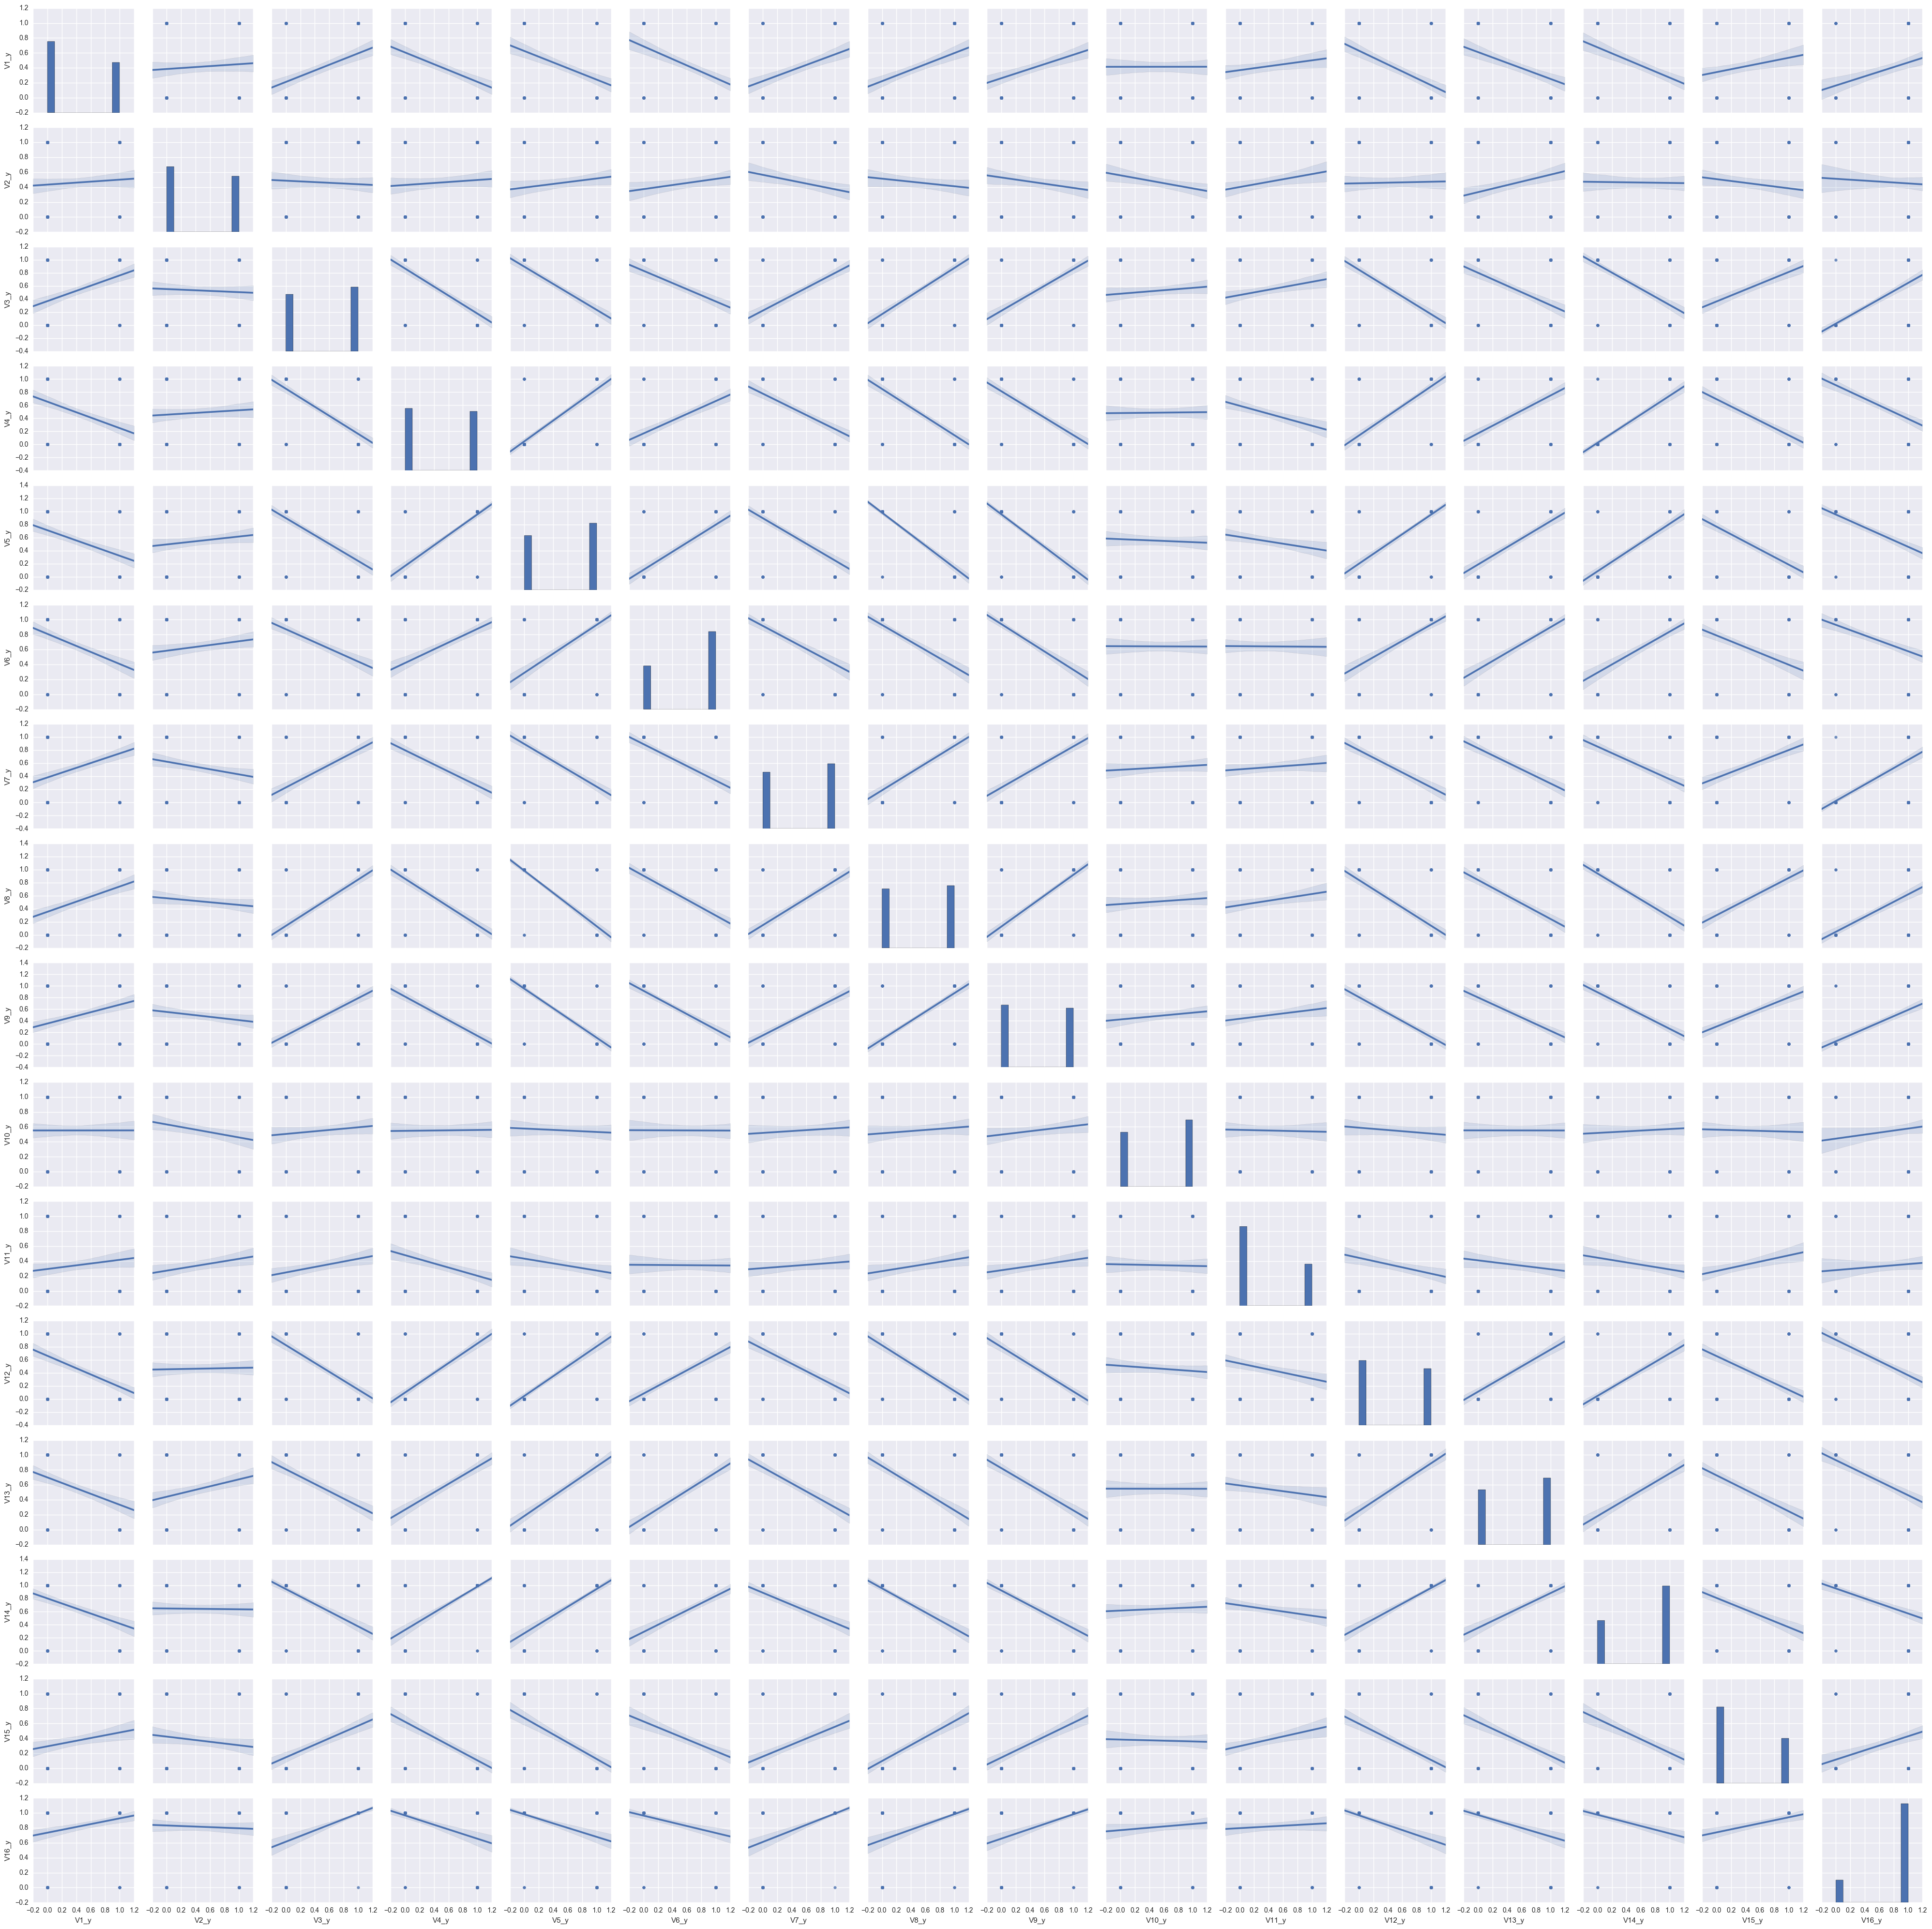

In [49]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
## If our features are independent of one another, PCA won't do much of anything.
## We can easily check for multicollinearity with pairplot. 
sns.pairplot(X, kind='reg')
plt.show()


Now, let's check the eigenvalues: 

And the eigenvectors: 

To find the principal components, find the eigenpairs, and sort them from highest to lowest. 

In [51]:
## Initialize the PCA from SKLearn. We're using 5 components because we have five input features.
subjective_pca = PCA(n_components=16)
## Fit the PCA
subjective_pca.fit(X.values)

PCA(copy=True, n_components=16, whiten=False)

In [52]:
## Return the loadings for each of the components
subj_components = subjective_pca.components_
subj_components

array([[  1.84933176e-01,  -4.88340738e-02,   2.90634152e-01,
         -3.10930053e-01,  -3.35099475e-01,  -2.53305163e-01,
          2.75833389e-01,   3.24795891e-01,   3.14140967e-01,
          2.19225785e-02,   7.80732634e-02,  -3.12859957e-01,
         -2.74464505e-01,  -2.71589549e-01,   2.24160524e-01,
          1.47499592e-01],
       [  1.94255835e-01,   6.85174935e-01,   5.24383629e-02,
         -1.36709873e-01,   2.10651975e-02,   9.82202083e-02,
         -1.63295841e-01,  -3.30099796e-02,  -9.70992171e-02,
         -4.47881127e-01,   4.22236568e-01,  -8.64250232e-02,
          1.10769048e-01,  -1.47758189e-01,   2.69234133e-02,
         -5.39311181e-02],
       [ -4.81783160e-03,   1.71895726e-01,   1.83910024e-01,
         -6.16921629e-02,   4.10579013e-02,   2.56363210e-01,
         -4.26201095e-02,   3.80125865e-02,   3.81159847e-02,
          7.78314092e-01,   4.22895177e-01,  -9.36407273e-02,
          1.96392456e-01,   9.77280326e-02,  -6.37078835e-02,
          1.2294

Now, calculate the explained variance. Recall the methods we learned in the lesson! 

In [53]:
## Return the loadings for each PCA, along with the column names that corresponding to each loading

print subjective_cols, '\n'
print '-------------------------------------\n'

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print pc, 'weighting vector:', subj_components[i]
    print '-------------------------------------\n'
        

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16'] 

-------------------------------------

PC1 weighting vector: [ 0.18493318 -0.04883407  0.29063415 -0.31093005 -0.33509948 -0.25330516
  0.27583339  0.32479589  0.31414097  0.02192258  0.07807326 -0.31285996
 -0.2744645  -0.27158955  0.22416052  0.14749959]
-------------------------------------

PC2 weighting vector: [ 0.19425584  0.68517493  0.05243836 -0.13670987  0.0210652   0.09822021
 -0.16329584 -0.03300998 -0.09709922 -0.44788113  0.42223657 -0.08642502
  0.11076905 -0.14775819  0.02692341 -0.05393112]
-------------------------------------

PC3 weighting vector: [-0.00481783  0.17189573  0.18391002 -0.06169216  0.0410579   0.25636321
 -0.04262011  0.03801259  0.03811598  0.77831409  0.42289518 -0.09364073
  0.19639246  0.09772803 -0.06370788  0.12294926]
-------------------------------------

PC4 weighting vector: [ 0.59697015  0.30651845  0.04617639  0.1470568   0.06068474 -

In [54]:
## Return the eigenvalues and the explained variance. 
## NOTE: In sklearn, explained_variance_ returns the eigenvalues
## while explained_variance_ratio_ gives us the actual explained variance.
subj_exp_var_eigenvals = subjective_pca.explained_variance_
subj_exp_var_pct = subjective_pca.explained_variance_ratio_

print 'eigenvalues:', subj_exp_var_eigenvals, '\n'
print 'explained variance pct:', subj_exp_var_pct
print subj_exp_var_pct.sum()


eigenvalues: [ 1.85684818  0.33334096  0.24824135  0.22545093  0.17979221  0.15498183
  0.12977685  0.12569668  0.11373144  0.0859938   0.08261698  0.07555432
  0.06799283  0.04947523  0.04405199  0.02585615] 

explained variance pct: [ 0.4887212   0.08773512  0.06533696  0.05933854  0.04732119  0.04079111
  0.03415718  0.03308328  0.02993404  0.02263351  0.02174473  0.01988585
  0.01789567  0.01302185  0.01159445  0.00680532]
1.0


In [56]:
## Call transform on the values. This will actually apply the PCA transformation to the data
subj_to_pcs = subjective_pca.transform(X.values)

Now, calculate the explained variance and the Cumulative explained variance

In [58]:
## Here, we're taking a look at the normalized values for each of the subjective features for the
## first observation, which we'll call person one.
person1_original_ratings = X.iloc[0, :]
print person1_original_ratings


V1_y     0.0
V2_y     1.0
V3_y     1.0
V4_y     0.0
V5_y     1.0
V6_y     1.0
V7_y     0.0
V8_y     0.0
V9_y     0.0
V10_y    0.0
V11_y    0.0
V12_y    0.0
V13_y    1.0
V14_y    1.0
V15_y    1.0
V16_y    1.0
Name: 5, dtype: float64


In [59]:
## Here, we're selecting from the sklearn output the loadings for observation one, for each of 
## the principal components. Recall that we returned this from subj_to_pcs above. 
person1_pcas = subj_to_pcs[0,:]
print person1_pcas


[-0.46906958  0.7220552  -0.11920334 -0.37239374  0.54703164  0.22012841
 -0.8130043   0.74012074  0.30498568  0.46873973  0.42166848 -0.20188938
  0.64138493 -0.15416802 -0.08773589  0.1131328 ]


In [60]:
## Let's verify the information above. SKLearn is effectively telling us that observation one has a
## -0.67 loading factor with principal component one. We can verify this value by deriving out the 
## loading factors from the total loading factors. 
confidence_weights = subj_components[0]


In [62]:
## First, I'm going to make a dataframe of the normalized ratings that subject 1 gave to themselves. 
how_to_make_pc1 = pd.DataFrame({'person1_original':person1_original_ratings.values},
                               index=X.columns)
how_to_make_pc1

,person1_original
V1_y,0.0
V2_y,1.0
V3_y,1.0
V4_y,0.0
V5_y,1.0
V6_y,1.0
V7_y,0.0
V8_y,0.0
V9_y,0.0
V10_y,0.0


In [63]:
## Now, I'm going to add the general loadings for each of the individual features. From these, 
## we can derive the loadings for subject one in relation to each of the individual features. 
how_to_make_pc1['weights_to_make_pc1'] = confidence_weights
how_to_make_pc1

,person1_original,weights_to_make_pc1
V1_y,0.0,0.184933
V2_y,1.0,-0.048834
V3_y,1.0,0.290634
V4_y,0.0,-0.310930
V5_y,1.0,-0.335099
V6_y,1.0,-0.253305
V7_y,0.0,0.275833
V8_y,0.0,0.324796
V9_y,0.0,0.314141
V10_y,0.0,0.021923


In [64]:
## Now, we're going to find the individual loading for subject one, by feature. To find this, we 
## can multiply person1's original normalized score by the overall loadings for the principal component to 
## find how much person1's responses to each of the subjective areas weights in on PC1.
how_to_make_pc1['pieces_of_pc1_value'] = how_to_make_pc1.person1_original * how_to_make_pc1.weights_to_make_pc1
how_to_make_pc1

,person1_original,weights_to_make_pc1,pieces_of_pc1_value
V1_y,0.0,0.184933,0.000000
V2_y,1.0,-0.048834,-0.048834
V3_y,1.0,0.290634,0.290634
V4_y,0.0,-0.310930,-0.000000
V5_y,1.0,-0.335099,-0.335099
V6_y,1.0,-0.253305,-0.253305
V7_y,0.0,0.275833,0.000000
V8_y,0.0,0.324796,0.000000
V9_y,0.0,0.314141,0.000000
V10_y,0.0,0.021923,0.000000


In [65]:
## Finally, we can take a sum of the "pieces" column to find the total weight of observation one
## on PC1. We can then compare that to what SKLearn gave us, and we have a match!
print 'sum of linear combinations of weights * original values for PC1:', np.sum(how_to_make_pc1.pieces_of_pc1_value)
print 'person 1s pca variables:', person1_pcas


sum of linear combinations of weights * original values for PC1: -0.520998499139
person 1s pca variables: [-0.46906958  0.7220552  -0.11920334 -0.37239374  0.54703164  0.22012841
 -0.8130043   0.74012074  0.30498568  0.46873973  0.42166848 -0.20188938
  0.64138493 -0.15416802 -0.08773589  0.1131328 ]


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
reading = X.values
reading[0:5]

array([[ 0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  0.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  1.,  1.]])

In [68]:
original_lr = LinearRegression()
## Here, we are feeding a linear regression, as well as the normalized "like" features
original_scores = cross_val_score(original_lr, X.values, reading, cv=11)
personas=X.columns
print personas
print original_scores
print np.mean(original_scores)
print np.std(original_scores)
print(np.mean(original_scores) - 1.96*np.std(original_scores),np.mean(original_scores) + 1.96*np.std(original_scores))




Index([u'V1_y', u'V2_y', u'V3_y', u'V4_y', u'V5_y', u'V6_y', u'V7_y', u'V8_y',
       u'V9_y', u'V10_y', u'V11_y', u'V12_y', u'V13_y', u'V14_y', u'V15_y',
       u'V16_y'],
      dtype='object')
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0
0.0
(1.0, 1.0)


Now, find and interperet the principal components

Now, repeat the process with sklearn.
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Case #2: Airport Delays

In this case, we want to look at this dataset in an unsupervised manner. 

In [6]:
air = pd.read_csv('datasets/airport.csv')

In [8]:
air.head()
air.shape


(841, 15)

Then, standardize the features for analysis

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

Then, check your eigenvalues and eigenvectors:

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

Next, Calculate the explained variance

Finally, conduct the PCA - use the results about to guide your selection of "n" componants